In [1]:
import pandas as pd
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
import random
import numpy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.corpus import stopwords
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import normalize
import math
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ltai2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('train.csv')

In [3]:
len(data)

290183

In [4]:
# data = data[data['Language'] == 'en']

In [5]:
len(data)

290183

In [6]:
data.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [7]:
data = data[['Genre', 'Language', 'Lyrics']]

In [8]:
data.rename(columns={'Genre':'genre', 'Language':'lang', 'Lyrics':'lyrics'}, inplace=True)

In [9]:
data

,genre,lang,lyrics
0,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,Rock,en,You say you know just who I am\nBut you can't ...
4,Rock,en,My heart is beating faster can't control these...
...,...,...,...
290178,R&B,en,I'm the best friend he's got I'd give him the ...
290179,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,Pop,en,Forgive me for the things That I never said to...
290181,Indie,en,The day they found a cure for AIDS The day the...


In [10]:
data['genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [11]:
# Rock = 1, Metal = 2, Pop = 3, Indie = 4, Folk = 5, Electronic = 6, R&B = 7, Jazz = 8, Hip-hop = 9, Country = 10
data['genre'][data['genre'] == 'Rock'] = 1
data['genre'][data['genre'] == 'Metal'] = 2
data['genre'][data['genre'] == 'Pop'] = 3
data['genre'][data['genre'] == 'Indie'] = 4
data['genre'][data['genre'] == 'Folk'] = 5
data['genre'][data['genre'] == 'Electronic'] = 6
data['genre'][data['genre'] == 'R&B'] = 7
data['genre'][data['genre'] == 'Jazz'] = 8
data['genre'][data['genre'] == 'Hip-Hop'] = 9
data['genre'][data['genre'] == 'Country'] = 10

In [12]:
data['genre']

0         1
1         1
2         1
3         1
4         1
         ..
290178    7
290179    3
290180    3
290181    4
290182    3
Name: genre, Length: 290183, dtype: object

In [13]:
data

,genre,lang,lyrics
0,1,en,"It starts with pain, followed by hate\nFueled ..."
1,1,en,Freedom!\nAlone again again alone\nPatiently w...
2,1,en,"Biting the hand that feeds you, lying to the v..."
3,1,en,You say you know just who I am\nBut you can't ...
4,1,en,My heart is beating faster can't control these...
...,...,...,...
290178,7,en,I'm the best friend he's got I'd give him the ...
290179,3,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,3,en,Forgive me for the things That I never said to...
290181,4,en,The day they found a cure for AIDS The day the...


In [14]:
data.dropna(axis=0, inplace=True)

In [15]:
data['lyrics'].isna().sum()

0

In [16]:
data = data.reset_index()

In [17]:
data

,index,genre,lang,lyrics
0,0,1,en,"It starts with pain, followed by hate\nFueled ..."
1,1,1,en,Freedom!\nAlone again again alone\nPatiently w...
2,2,1,en,"Biting the hand that feeds you, lying to the v..."
3,3,1,en,You say you know just who I am\nBut you can't ...
4,4,1,en,My heart is beating faster can't control these...
...,...,...,...,...
290139,290178,7,en,I'm the best friend he's got I'd give him the ...
290140,290179,3,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290141,290180,3,en,Forgive me for the things That I never said to...
290142,290181,4,en,The day they found a cure for AIDS The day the...


In [18]:
data_dict = data.set_index('index').T.to_dict()

In [19]:
data_dict[1]

{'genre': 1,
 'lang': 'en',
 'lyrics': "Freedom!\nAlone again again alone\nPatiently waiting by the phone\nHoping that you will call me home\nThe pain inside my love denied\nHopes and dreams swallowed by pride\nEverything I need it lies in you\n'Cause I'm broken\nI know I need you now\n'Cause deep inside I'm broken\nYou see the way I live\nI know I know your heart is broken\nWhen I turn away\nI need to be broken\nTake the pain away\nI question why you chose to die\nWhen you knew your truth I would deny\nYou look at me\nThe tears begin to fall\nAnd all in all faith is blind\nBut I fail time after time\nDaily in my sin I take your life\n'Cause I'm broken\nI know I need you now\n'Cause deep inside I'm broken\nYou see the way I live\nI know I know your heart is broken\nWhen I turn away\nI need to be broken\nTake the pain away\nAll the hate deep inside\nSlowly covering my eyes\nAll these things I hide\nAway from you again\nAll this fear holding me\nMy heart is cold and I believe\nNothing's 

In [20]:
punct = set(string.punctuation)
def cleanLyrics(data):
    for d in data:           
        data[d]['lyrics'] = data[d]['lyrics'].replace('\n', ' ').lower()
        non_punct = []
        for w in data[d]['lyrics'].split():
            w = ''.join([c for c in w.lower() if not c in punct])
            non_punct.append(w)
        delim = " "
        data[d]['lyrics'] = delim.join(non_punct)

In [21]:
cleanLyrics(data_dict)

In [22]:
data_dict[1]

{'genre': 1,
 'lang': 'en',
 'lyrics': 'freedom alone again again alone patiently waiting by the phone hoping that you will call me home the pain inside my love denied hopes and dreams swallowed by pride everything i need it lies in you cause im broken i know i need you now cause deep inside im broken you see the way i live i know i know your heart is broken when i turn away i need to be broken take the pain away i question why you chose to die when you knew your truth i would deny you look at me the tears begin to fall and all in all faith is blind but i fail time after time daily in my sin i take your life cause im broken i know i need you now cause deep inside im broken you see the way i live i know i know your heart is broken when i turn away i need to be broken take the pain away all the hate deep inside slowly covering my eyes all these things i hide away from you again all this fear holding me my heart is cold and i believe nothings gonna change until im broken this time let go 

Performing EDA:

In [23]:
# logistic regression model

In [24]:
random.seed(1234)

data_list = [data_dict[d] for d in data_dict]
random.shuffle(data_list)

nTrain = int(len(data_list) * 0.8)
train = data_list[:nTrain]
test = data_list[nTrain:]

In [25]:
len(test) / len(data_list)

0.20000068931289292

In [26]:
stop_words = stopwords.words('english')

wordCount = defaultdict(int)
for d in train:
    for w in d['lyrics'].split():
        if w not in stop_words:
            wordCount[w] += 1

wCounts = []
for w in wordCount:
    wCounts.append((wordCount[w], w))
wCounts.sort(reverse=True)

In [27]:
len(wCounts)

357120

In [28]:
dict_size = 2000

words = [x[1] for x in wCounts[:dict_size]]
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

def feature(d):
    res = [0] * dict_size
    for w in d['lyrics'].split():
        if w in wordSet:
            res[wordId[w]] += 1 
            
    # calculate tfidf
#     tfidf = [0] * dict_size
#     for w in d['review_text'].split():
#         w = ''.join([c for c in w.lower() if not c in punct])
#         if w in wordSet:
#             if w == '': continue
#             tfidf[wordId[w]] = res[wordId[w]] * math.log2(len(train) / df[w])
#     for i in range(len(res)):
#         res[i] = res[i] / len(res)
    return res + [1]

In [29]:
X = [feature(d) for d in data_list]
y = [d['genre'] for d in data_list]

In [30]:
Xtrain = X[:nTrain]
ytrain = y[:nTrain]
Xtest = X[nTrain:]
ytest = y[nTrain:]

In [31]:
# C = [0.001, 0.01, 0.1, 1, 10]
# acc_list = []
# for c in C:
#     print('c: ', c)
    
#     model = linear_model.LogisticRegression(C=c, max_iter=200)
#     model.fit(Xtrain, ytrain)
    
#     pred = model.predict(Xtest)
#     correct = pred == ytest
    
#     acc_logistic_BoW = sum(correct) / len(correct)
#     acc_list.append(acc_logistic_BoW)

# print('Accuracy logistic regression: ', acc_list)
# print('Best C: ', C[np.argmax(acc_list)]

In [32]:
bestC = 0.001

In [33]:
model = linear_model.LogisticRegression(C=bestC, max_iter=800)
model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)
correct = pred == ytest

acc_logistic_BoW = sum(correct) / len(correct)

print('Accuracy logistic regression: ', acc_logistic_BoW)

Accuracy logistic regression:  0.5997173826879664


In [37]:
cm = confusion_matrix(ytest, list(pred))

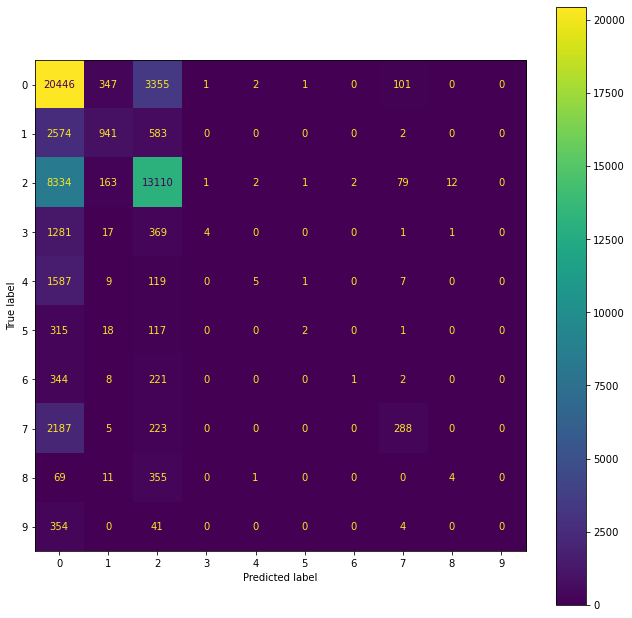

In [40]:
cm_plot = ConfusionMatrixDisplay(cm, range(10))
fig, ax = plt.subplots(figsize=(11,11))
cm_plot.plot(ax=ax, values_format='')

In [44]:
precision_logistic = [cm[i][i] for i in range(len(cm)-1)] / cm.sum(axis=0)[:-1]
avg_precision_logistic = precision_logistic.mean()

In [45]:
print('Logistic average precision: ', avg_precision_logistic)

Logistic average precision:  0.5114299438740086


In [ ]:
### with tf-idf

In [93]:
dict_size = 1000

words = [x[1] for x in wCounts[:dict_size]]
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [94]:
df = defaultdict(int)
for d in train:
    for w in set(d['lyrics'].split()): # set will reduce this list into unique words only
        if w not in stop_words:
            df[w] += 1

In [95]:
def featureTFIDF(d):
    res = [0] * dict_size
    for w in d['lyrics'].split():
        if w in wordSet:
            res[wordId[w]] += 1 

    # calculate tfidf
    tfidf = [0] * dict_size
    for w in d['lyrics'].split():
        if w in wordSet:
            if w == '': continue
            tfidf[wordId[w]] = res[wordId[w]] * math.log2(len(train) / df[w])
            
    tfidf_array = np.array(tfidf).reshape(1,-1)
    
    tfidf_array = normalize(tfidf_array, axis=1)[0]
    tfidf_list = [x for x in tfidf_array]
    return tfidf_list

In [96]:
X = [featureTFIDF(d) for d in data_list]
y = [d['genre'] for d in data_list]

In [97]:
Xtrain = X[:nTrain]
ytrain = y[:nTrain]
Xtest = X[nTrain:]
ytest = y[nTrain:]

In [98]:
# C = [0.001, 0.01, 0.1, 1, 10]
# acc_list = []
# for c in C:
#     print('c: ', c)
    
#     model = linear_model.LogisticRegression(C=c, max_iter=200)
#     model.fit(Xtrain, ytrain)
    
#     pred = model.predict(Xtest)
#     correct = pred == ytest
    
#     acc_logistic_BoW = sum(correct) / len(correct)
#     acc_list.append(acc_logistic_BoW)

# print('Accuracy logistic regression: ', acc_list)
# print('Best C: ', C[np.argmax(acc_list)])

c:  0.001
c:  0.01
c:  0.1
c:  1


C:\Users\ltai2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:  10


C:\Users\ltai2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy logistic regression:  [0.5426941701563012, 0.569232625066777, 0.5899981043960778, 0.594289062365369, 0.5954781230074618]
Best C:  10


In [87]:
normalize(np.array([0,4,1,0]).reshape(1,-1), axis=1)[0]

array([0.        , 0.9701425 , 0.24253563, 0.        ])

In [100]:
print('Highest accuracy logistic regression: ', max(acc_list))

Highest accuracy logistic regression:  0.5954781230074618


In [101]:
bestC = 10

In [102]:
model = linear_model.LogisticRegression(C=bestC, max_iter=800)
model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)
correct = pred == ytest

acc_logistic_tfidf = sum(correct) / len(correct)

print('Accuracy logistic regression: ', acc_logistic_tfidf)

C:\Users\ltai2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy logistic regression:  0.5953919591928174


In [103]:
cm = confusion_matrix(ytest, list(pred))

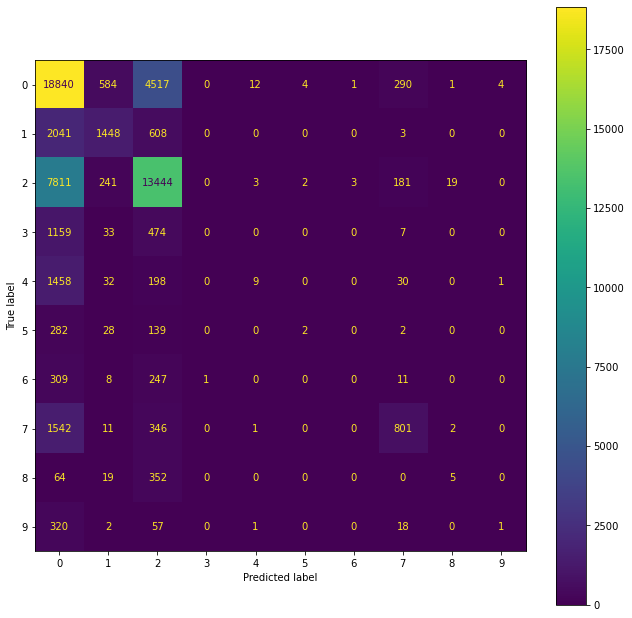

In [104]:
cm_plot = ConfusionMatrixDisplay(cm, range(10))
fig, ax = plt.subplots(figsize=(11,11))
cm_plot.plot(ax=ax, values_format='')

In [106]:
precision_logistic_tfidf = [cm[i][i] for i in range(len(cm))] / cm.sum(axis=0)
avg_precision_logistic_tfidf = precision_logistic_tfidf.mean()

In [108]:
print('Logistic average precision with tfidf: ', avg_precision_logistic_tfidf)

Logistic average precision with tfidf:  0.336282999360678


In [110]:
len(wCounts)

357120